In [370]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import os

data = pd.read_csv('Country-data.csv')
data_selected = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

print(data.head())

               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  


In [371]:
print(data.isnull().sum())
print(data.shape[0])

#Видалення рядків з пропущеними значеннями
data = data.dropna()
print(data.shape[0])

data = data.drop_duplicates()
print(data.shape[0])

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64
167
167
167


In [372]:
print(data.describe())

       child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000

In [373]:
#Розподіл значень категоріальних змінних
print(data['country'].value_counts())

print(any(data['country'].value_counts() > 1))

country
Afghanistan                       1
Morocco                           1
Myanmar                           1
Namibia                           1
Nepal                             1
Netherlands                       1
New Zealand                       1
Niger                             1
Nigeria                           1
Norway                            1
Oman                              1
Pakistan                          1
Panama                            1
Paraguay                          1
Peru                              1
Philippines                       1
Poland                            1
Portugal                          1
Qatar                             1
Mozambique                        1
Montenegro                        1
Russia                            1
Mongolia                          1
Lebanon                           1
Lesotho                           1
Liberia                           1
Libya                             1
Lithuania           

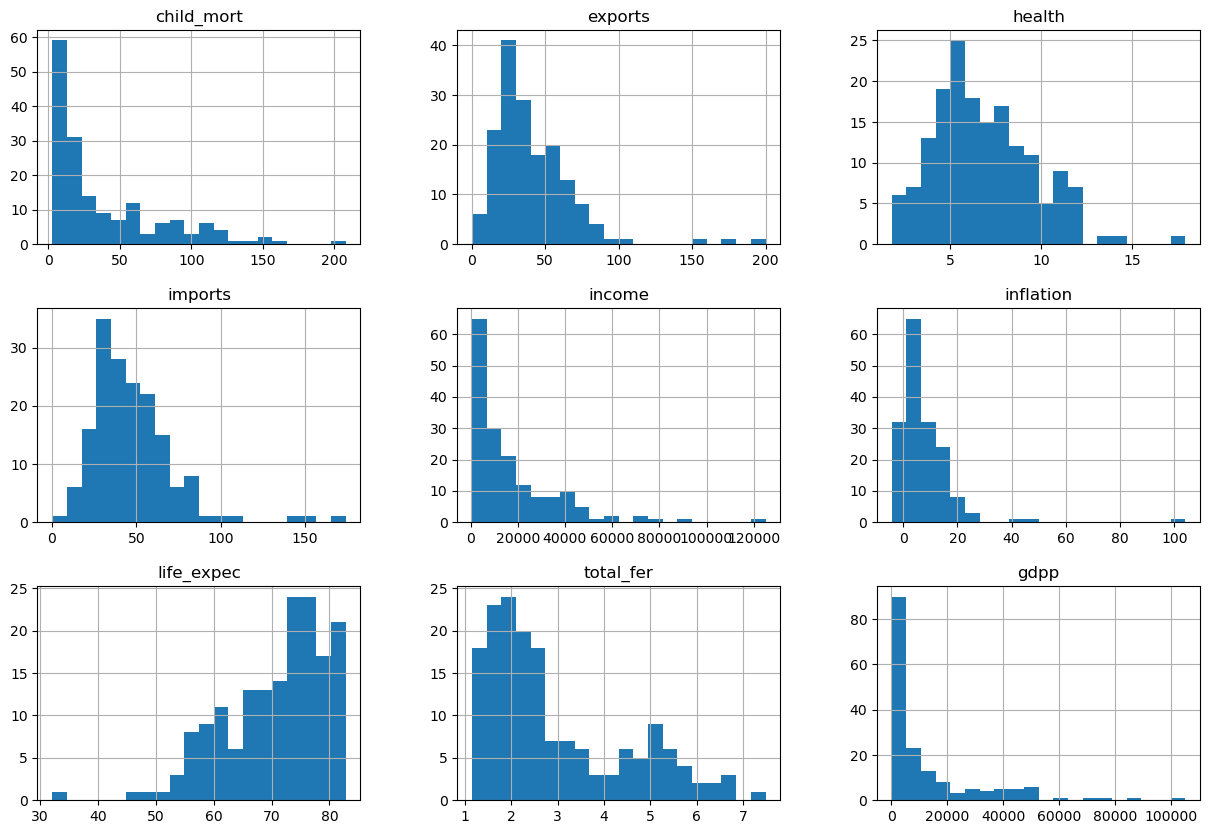

In [374]:
#Гістограма числових змінних
data.hist(bins=20, figsize=(15, 10))
plt.show()


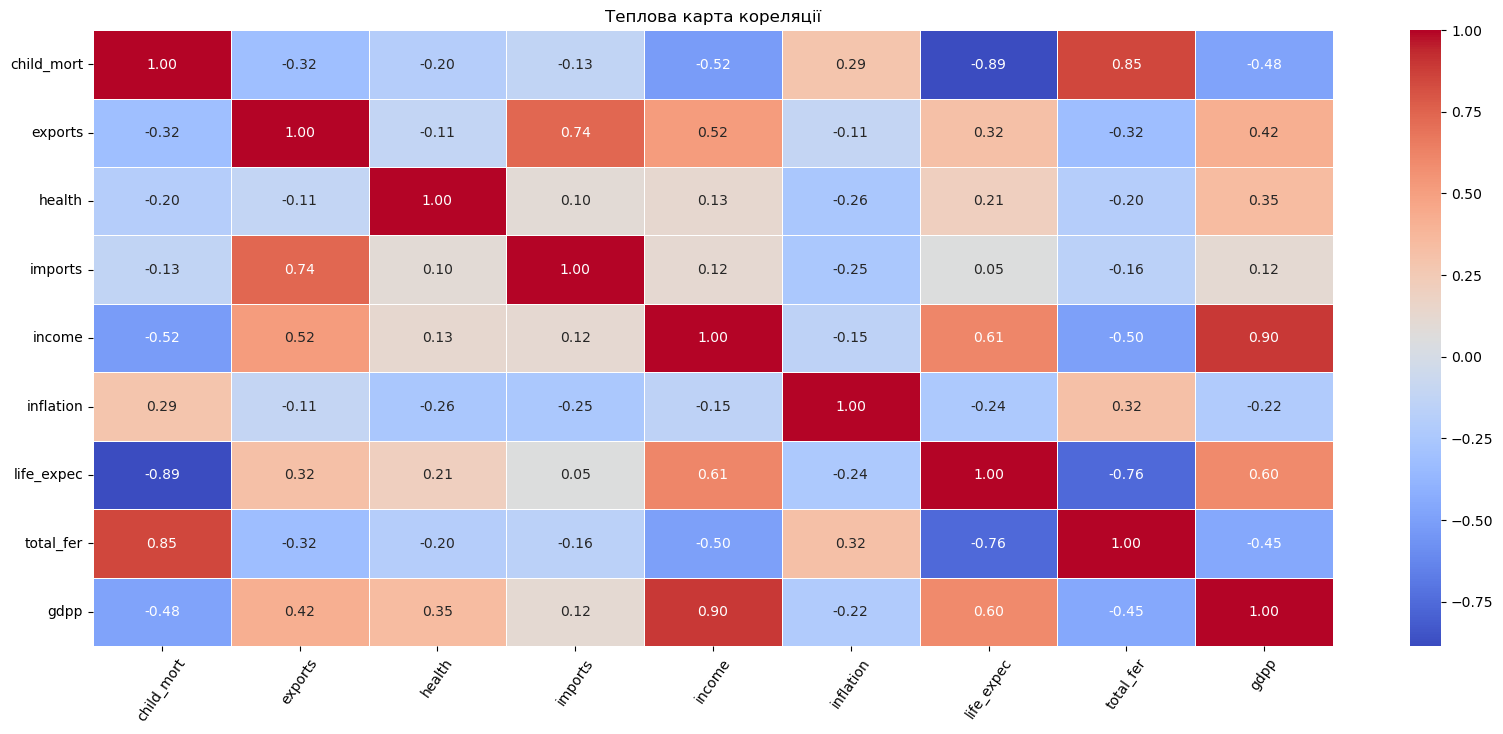

In [375]:
#Кореляційна матриця
correlation_matrix = data[data_selected].corr()

plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Теплова карта кореляції')
plt.xticks(rotation=55)
plt.yticks(rotation=360)
plt.show()

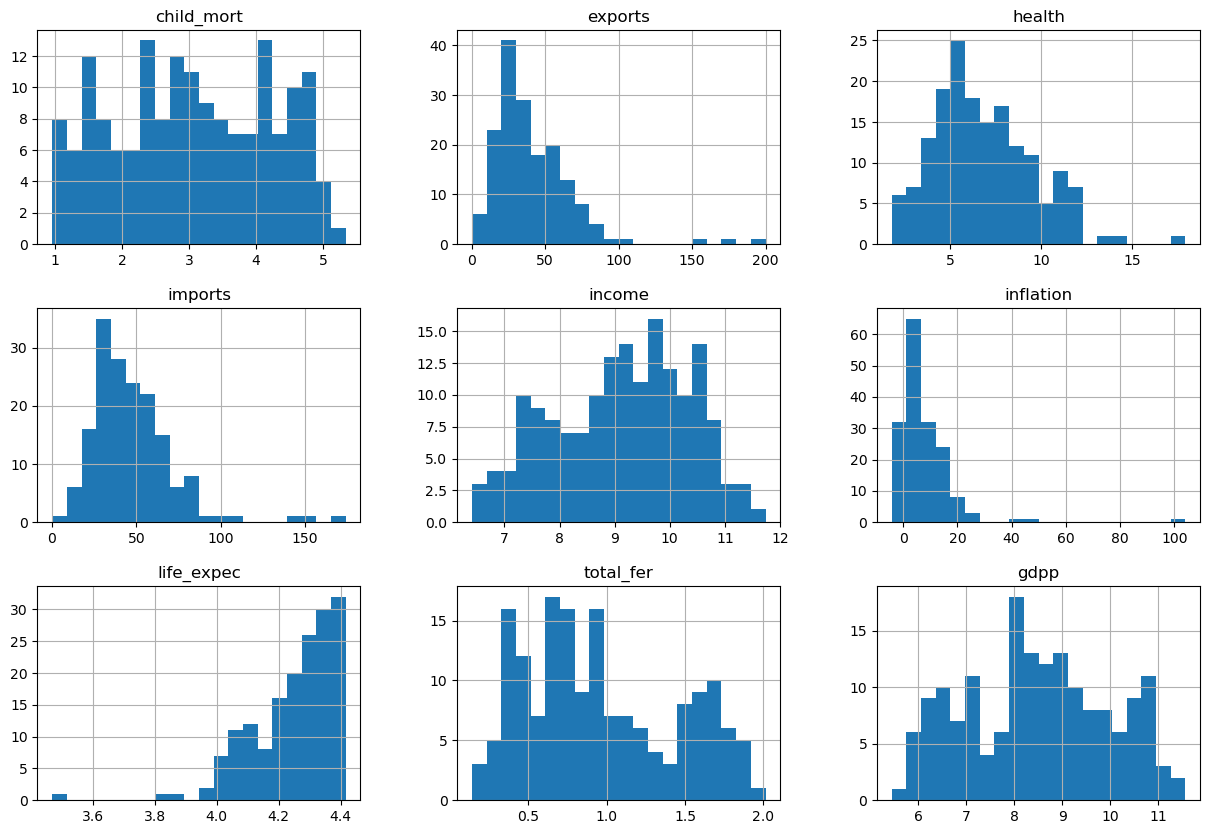

In [376]:
data[data_selected[0]] = np.log(data[data_selected[0]])
data[data_selected[4]] = np.log(data[data_selected[4]])
data[data_selected[6]] = np.log(data[data_selected[6]])
data[data_selected[7]] = np.log(data[data_selected[7]])
data[data_selected[8]] = np.log(data[data_selected[8]])
data.hist(bins=20, figsize=(15, 10))
plt.show()


c:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


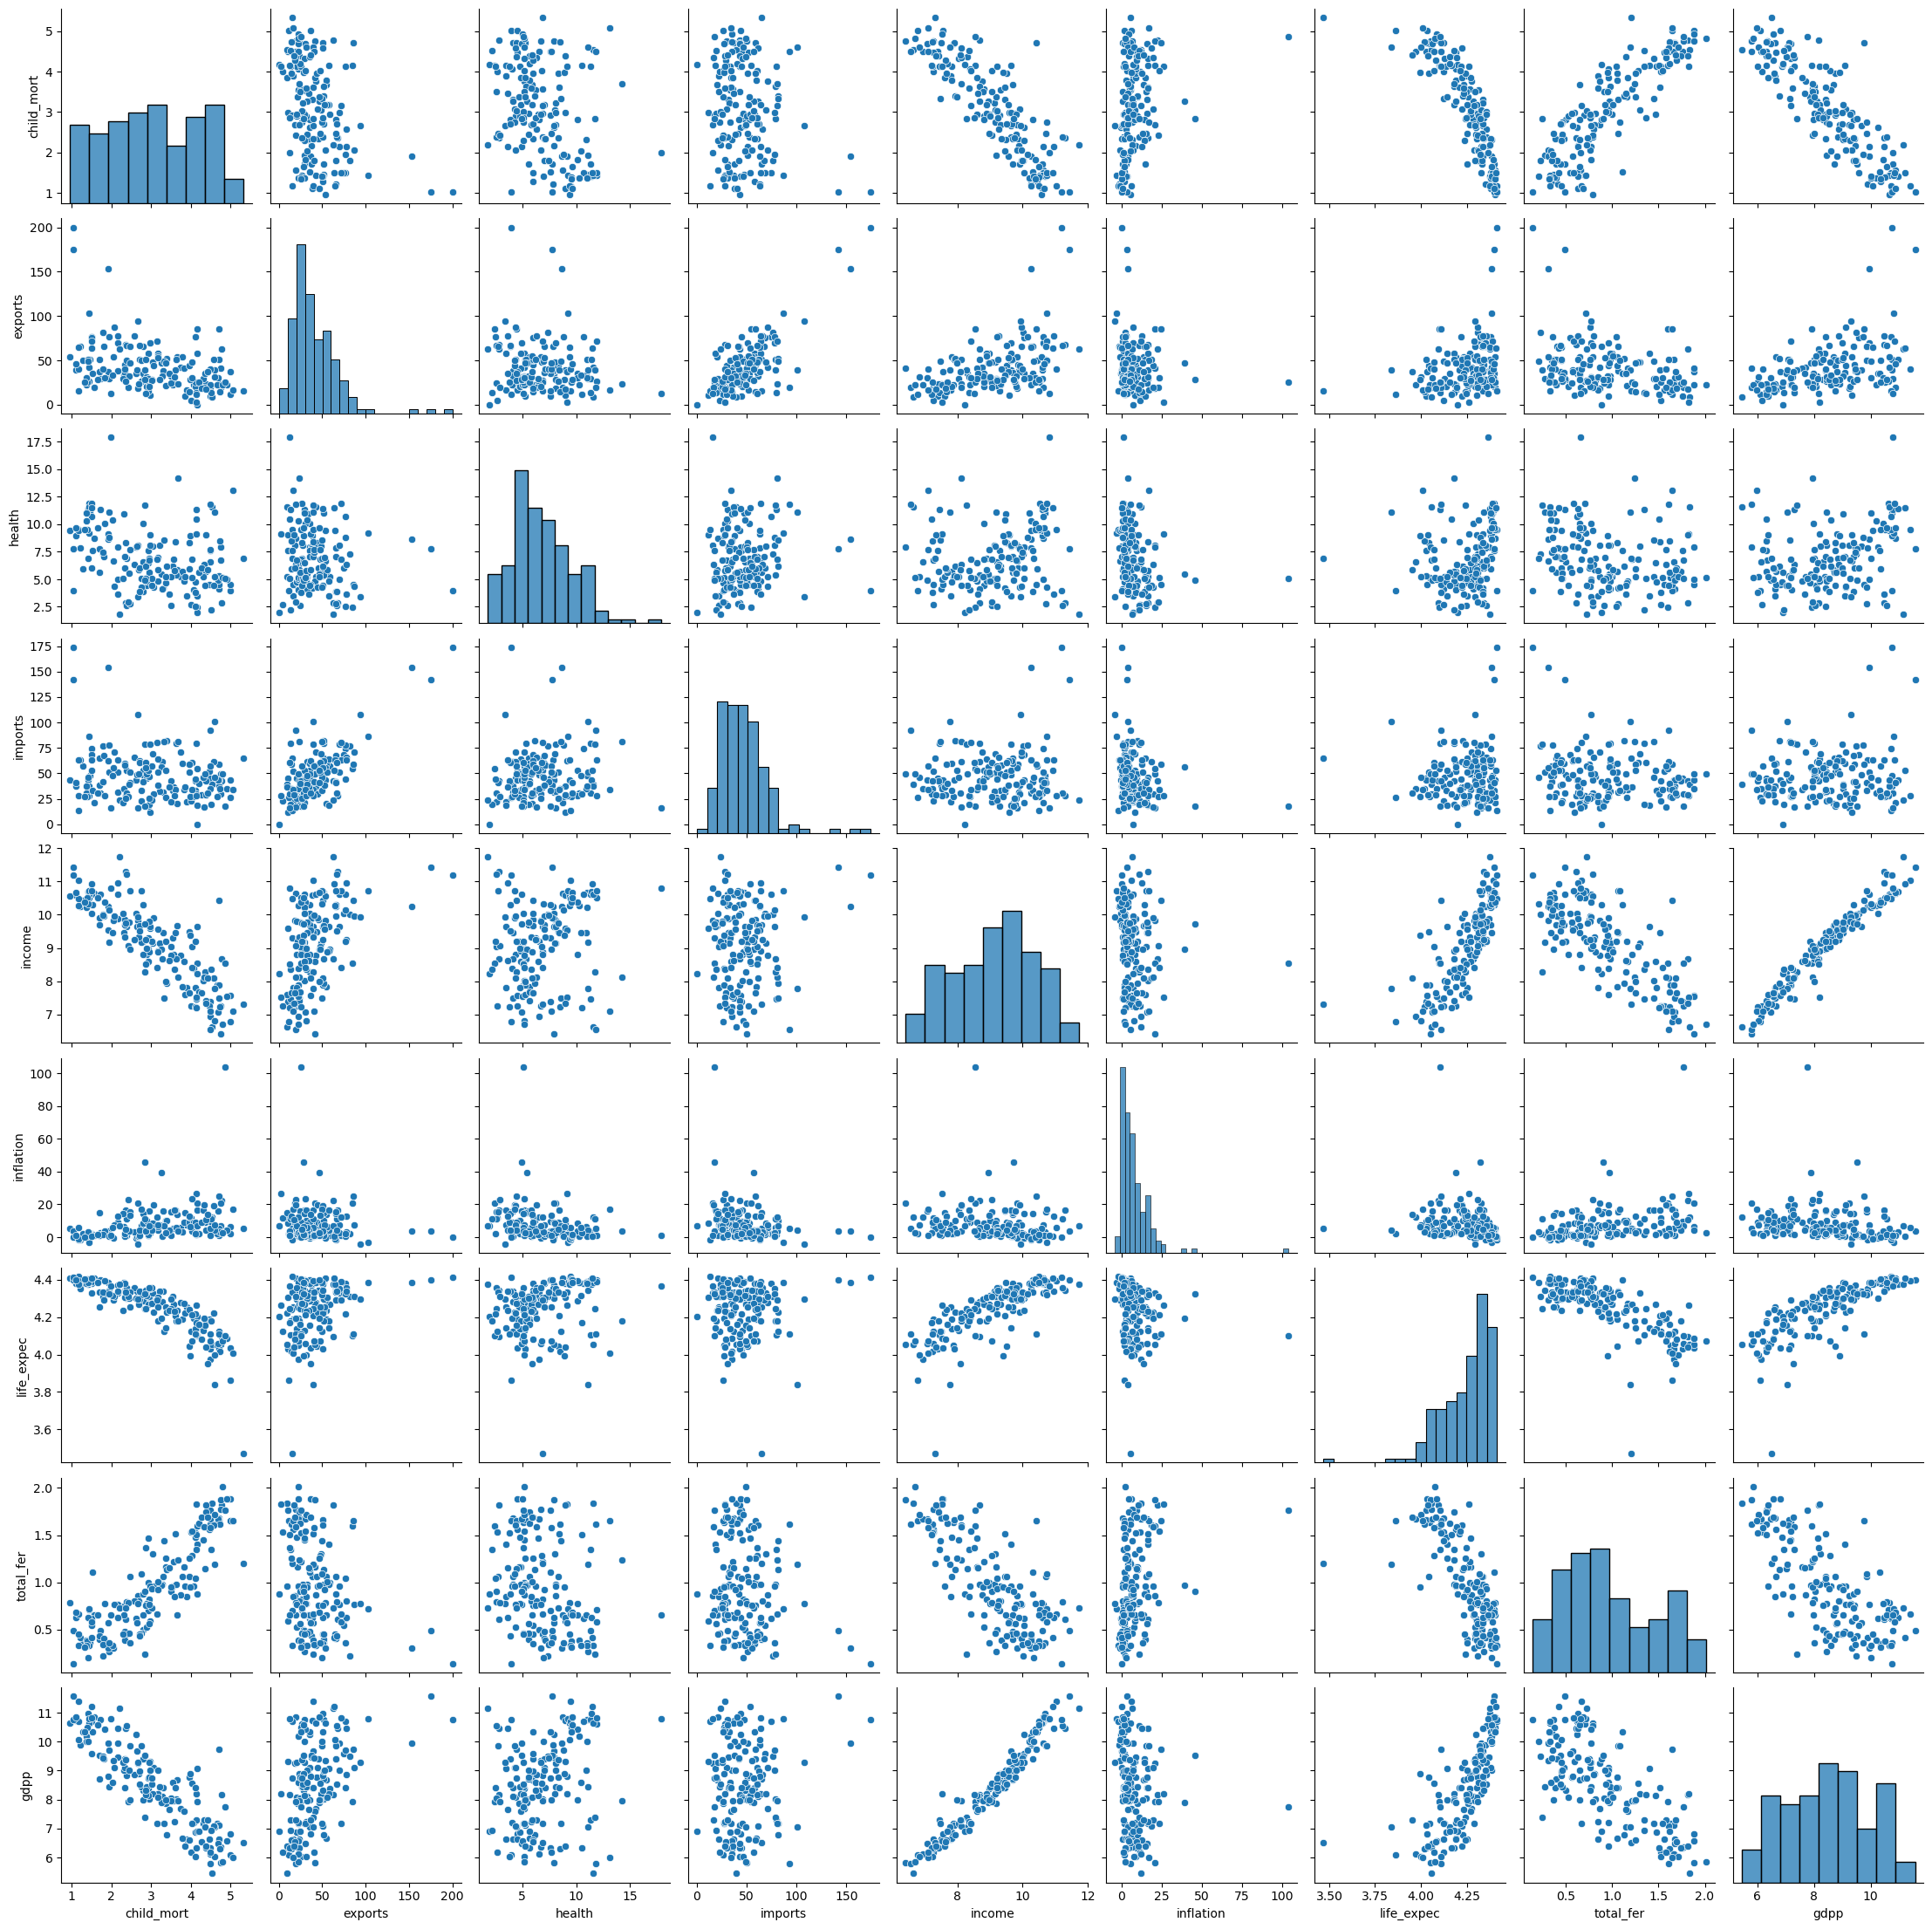

In [377]:
sns.pairplot(data)
plt.show()

c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows wi

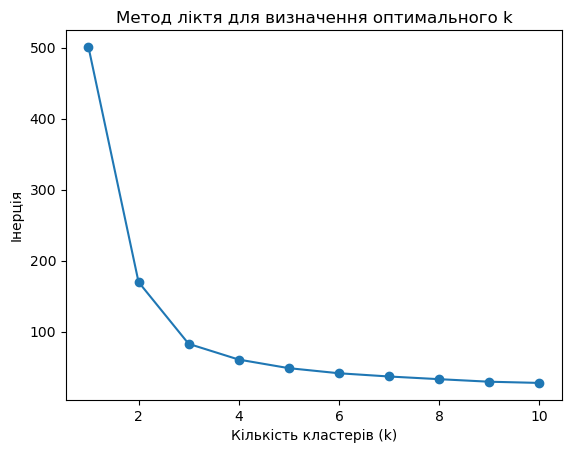

In [378]:
NUM_THREADS = "1"

os.environ["OMP_NUM_THREADS"] = NUM_THREADS
os.environ["OPENBLAS_NUM_THREADS"] = NUM_THREADS
os.environ["MKL_NUM_THREADS"] = NUM_THREADS
os.environ["VECLIB_MAXIMUM_THREADS"] = NUM_THREADS
os.environ["NUMEXPR_NUM_THREADS"] = NUM_THREADS


# Вибираємо змінні для кластеризації
X = data[['gdpp', 'child_mort', 'income']]

# Нормалізація даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Графік методу ліктя
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Кількість кластерів (k)')
plt.ylabel('Інерція')
plt.title('Метод ліктя для визначення оптимального k')
plt.show()

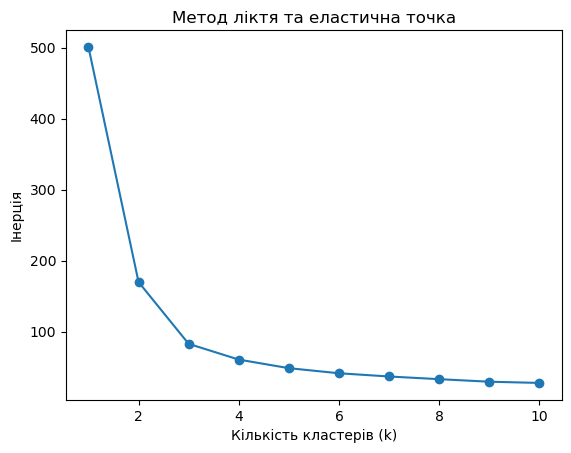

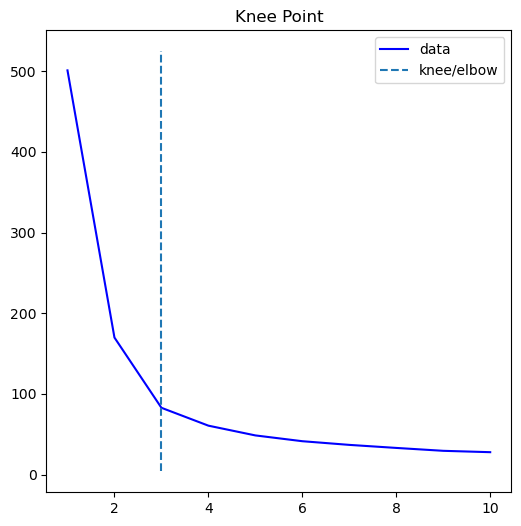

Оптимальна кількість кластерів: 3


In [379]:
import numpy as np
from kneed import KneeLocator
import matplotlib.pyplot as plt


# Використовуємо kneed для визначення еластичної точки
kl = KneeLocator(range(1, 11), inertia, curve='convex', direction='decreasing')

# Виведення графіку та еластичної точки
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Кількість кластерів (k)')
plt.ylabel('Інерція')
plt.title('Метод ліктя та еластична точка')
kl.plot_knee()
plt.show()


# Виведення оптимальної кількості кластерів
print("Оптимальна кількість кластерів:", kl.elbow)

c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


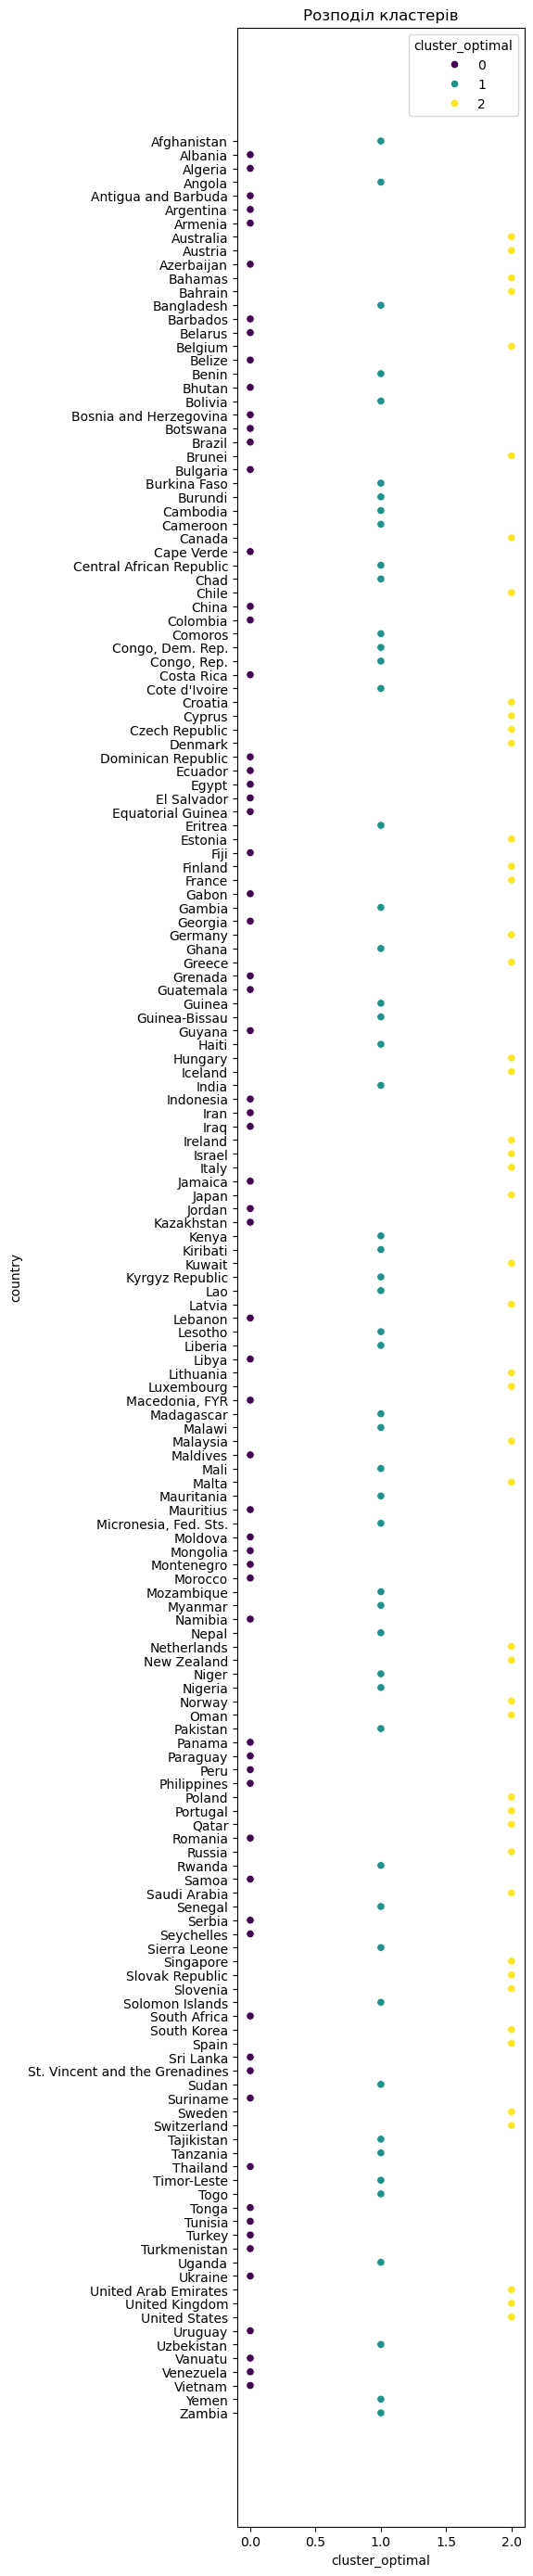

In [380]:
# Виведення графіку розподілу кластерів
kmeans_optimal = KMeans(n_clusters=kl.elbow, n_init=10)
data['cluster_optimal'] = kmeans_optimal.fit_predict(X_scaled)

plt.figure(figsize=(4, 35))
sns.scatterplot(x='cluster_optimal', y='country', hue='cluster_optimal', data=data, palette='viridis', legend='full')

plt.title('Розподіл кластерів')
plt.show()

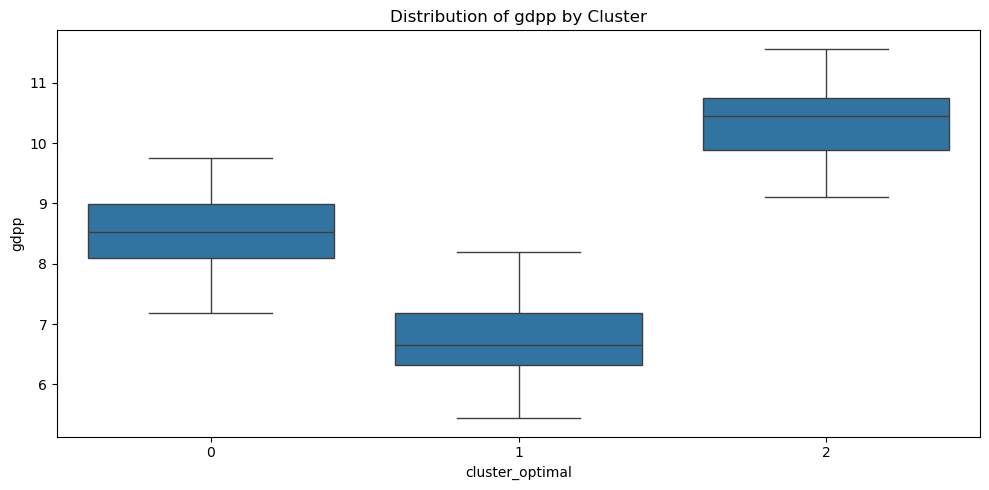

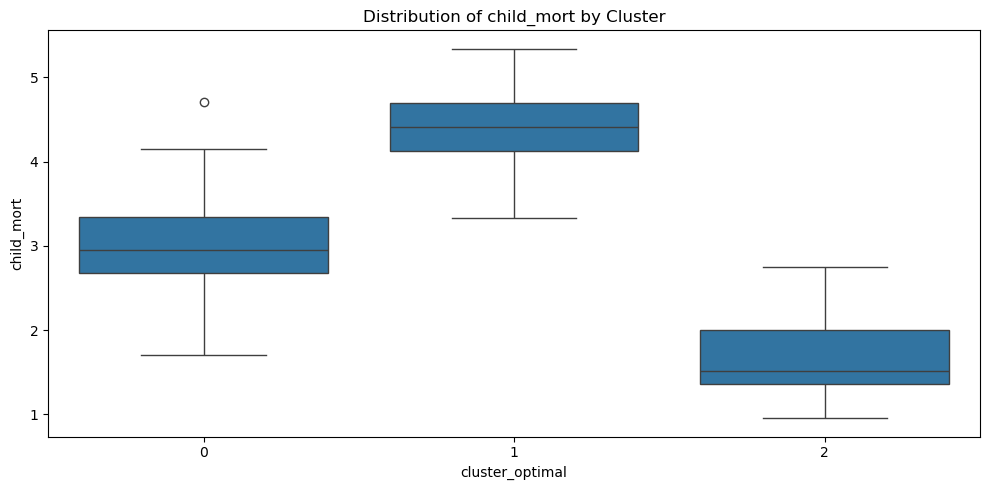

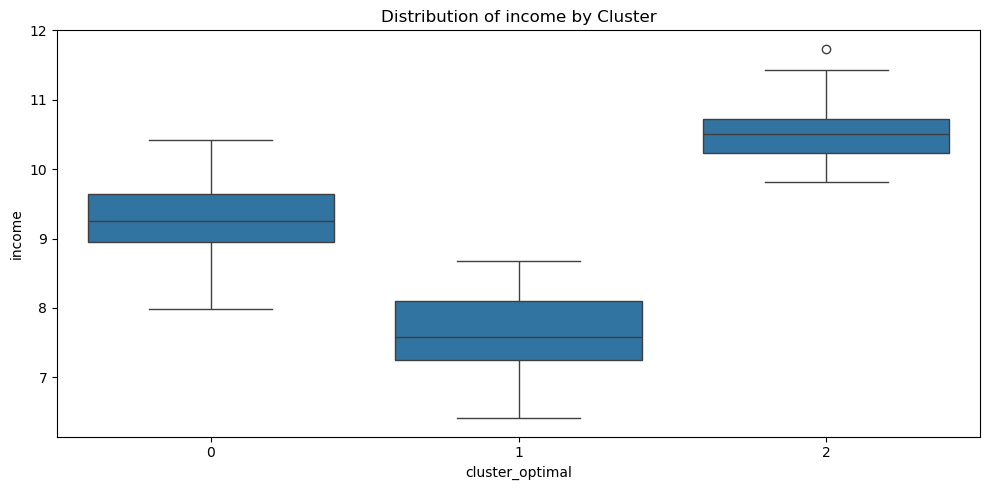

Top 5:
      country  child_mort  exports  health  imports    income  inflation  \
69      India    4.074142     22.6    4.05     27.1  8.391630       8.98   
80      Kenya    4.130355     20.7    4.75     33.6  7.816014       2.09   
81   Kiribati    4.138361     13.3   11.30     79.9  7.455877       1.52   
165     Yemen    4.030695     30.0    5.18     34.4  8.407378      23.60   
166    Zambia    4.420045     37.0    5.89     30.9  8.095599      14.00   

     life_expec  total_fer      gdpp  
69     4.192680   0.955511  7.207860  
80     4.139955   1.474763  6.874198  
81     4.105944   1.345472  7.306531  
165    4.212128   1.541159  7.177782  
166    3.951244   1.686399  7.286192  


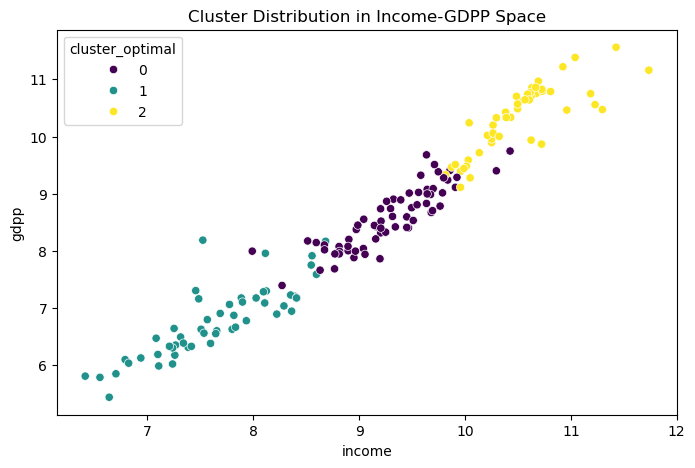

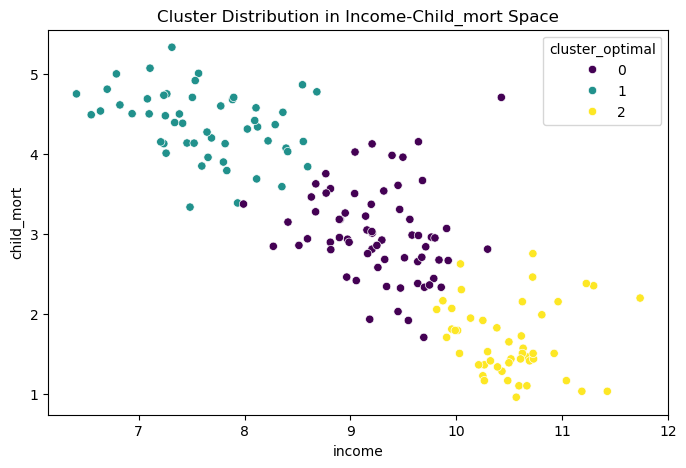

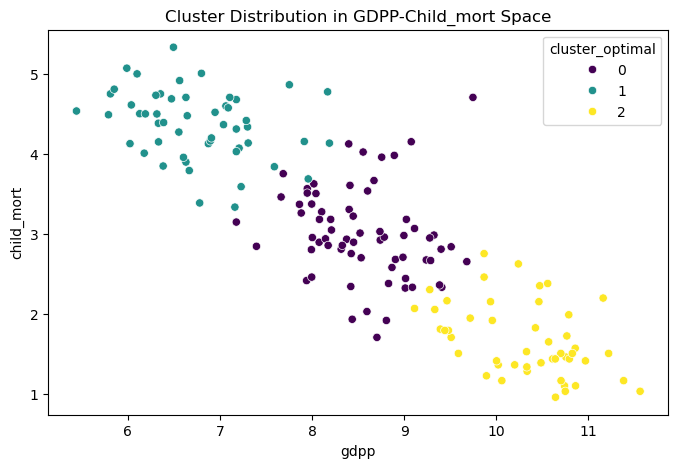

In [381]:
# Визначення топ-5 країн, які найбільше потребують допомоги
top_5_countries = data[data['cluster_optimal'] == 1].sort_values(by='cluster_optimal').tail(5)

# Виведення графіків розподілу кластерів
plt.figure(figsize=(10, 5))
sns.boxplot(x='cluster_optimal', y='gdpp', data=data)
plt.title(f'Distribution of gdpp by Cluster')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='cluster_optimal', y='child_mort', data=data)
plt.title(f'Distribution of child_mort by Cluster')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='cluster_optimal', y='income', data=data)
plt.title(f'Distribution of income by Cluster')
plt.tight_layout()
plt.show()
# Виведення та збереження топ-5 країн, які найбільше потребують допомоги
print("Top 5:")
print(top_5_countries[['country'] + data_selected])

# Збереження графіку кластерів
plt.figure(figsize=(8, 5))
sns.scatterplot(x='income', y='gdpp', hue='cluster_optimal', data=data, palette='viridis', legend='full')
plt.title('Cluster Distribution in Income-GDPP Space')
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(x='income', y='child_mort', hue='cluster_optimal', data=data, palette='viridis', legend='full')
plt.title('Cluster Distribution in Income-Child_mort Space')
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_optimal', data=data, palette='viridis', legend='full')
plt.title('Cluster Distribution in GDPP-Child_mort Space')
plt.show()